In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from pymatgen.util.plotting_utils import get_publication_quality_plot
from pyqe.qe_output import *

mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=3
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.markersize']=5
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4

In [2]:
from pymatgen.core.composition import Composition

def get_kpts_plot(formula,tol=5):
    c = Composition(formula)
    n = c.num_atoms
    b = BasicAnalyzer('%s_kpts.csv' % formula,'nkpts',1/n)
    df = analyze_kgrid(b)
    plt = get_convergence_plot(df,'kgrid','energy',tol)
    plt.ylabel('Energy (meV/atom)')
    plt.xlabel('$k$ in $k\\times k\\times k$ grid')
    plt.tight_layout()
    return plt

14


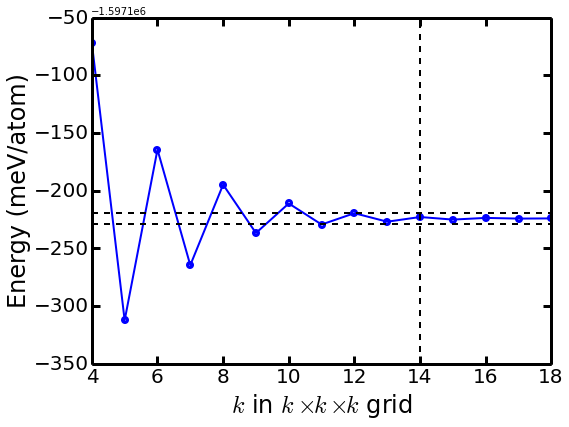

In [3]:
plt_cu = get_kpts_plot('Cu')
plt_cu.savefig('Cu_kpts.pdf')

16


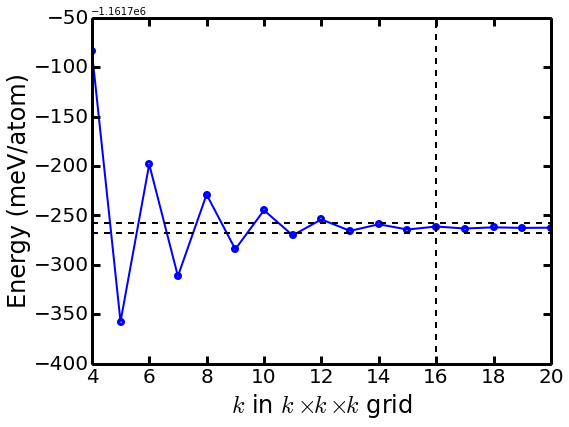

In [4]:
plt_au = get_kpts_plot('Au')
plt_au.savefig('Au_kpts.pdf')

8


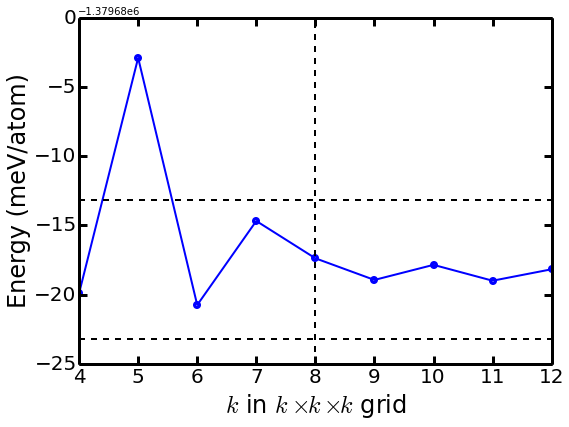

In [5]:
plt_ca = get_kpts_plot('Cu2Au2')
plt_ca.savefig('Cu2Au2_kpts.pdf')

7


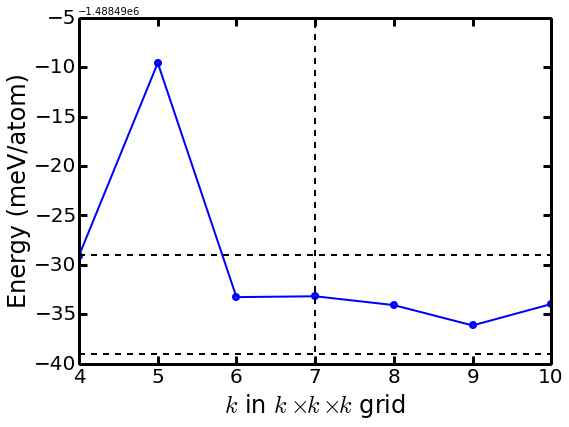

In [6]:
plt_c3a = get_kpts_plot('Cu3Au')
plt_c3a.savefig('Cu3Au_kpts.pdf')

7


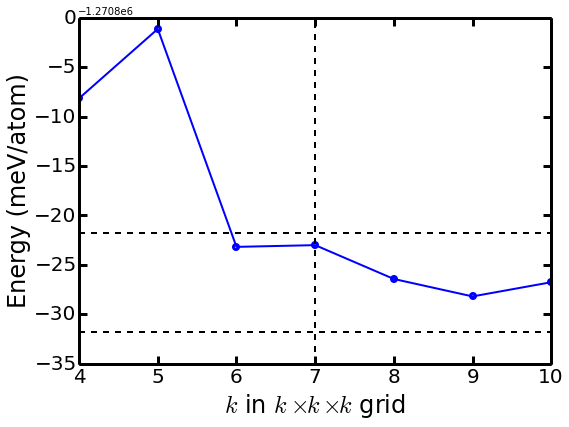

In [7]:
plt_ca3 = get_kpts_plot('CuAu3')
plt_ca3.savefig('CuAu3_kpts.pdf')

In [8]:
from pymatgen.phasediagram.entries import PDEntry
from pymatgen.phasediagram.pdmaker import PhaseDiagram

def get_pd_entry(formula):
    b = BasicAnalyzer('%s_kpts.csv' % formula,'nkpts',1.0/1000)
    energy = b['energy'][-1]
    return PDEntry(formula,energy)

def get_pd_entry_dict():
    entry_dict = {}
    for formula in ['Cu','Cu3Au','Cu2Au2','CuAu3','Au']:
        entry_dict[formula] = get_pd_entry(formula)
    return entry_dict

def get_pd():
    entry_dict = get_pd_entry_dict()
    return PhaseDiagram(entry_dict.values())

Cu3Au -40.3547102856
Cu2Au2 -54.9721641519
CuAu3 -23.9534130922


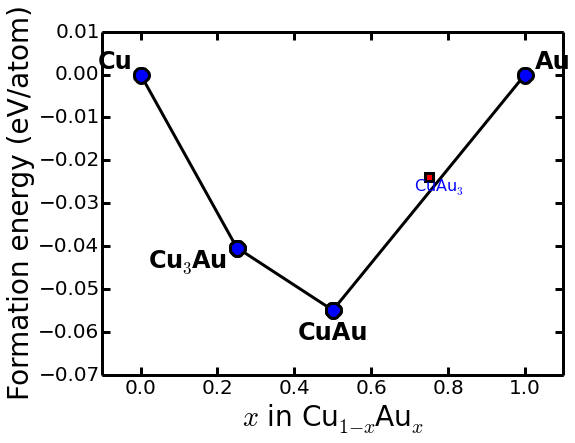

In [9]:
from pymatgen.phasediagram.plotter import PDPlotter

pd = get_pd()
pdict = get_pd_entry_dict()
pdp = PDPlotter(pd,show_unstable=True)
plt_pd = pdp.get_plot()
plt_pd.ylim(-0.07,0.01)
plt_pd.ylabel('Formation energy (eV/atom)',fontweight='normal')
plt_pd.xlabel('$x$ in Cu$_{1-x}$Au$_x$',fontweight='normal')
plt_pd.tight_layout()
plt_pd.savefig('fe.pdf')
for f in ['Cu3Au','Cu2Au2','CuAu3']:
    print f,pd.get_form_energy_per_atom(pdict[f])*1000